In [1]:
from sknn.platform import gpu32
from sknn import ae
import numpy as np
import pandas as pd
from scipy.spatial.distance import cosine
import matplotlib.pyplot as plt
plt.gray()
%matplotlib inline

- **Load MNIST Data (Test Set)**

In [2]:
# Takes 10 - 20 seconds depending on internet connection
mnist = pd.read_csv('https://s3.amazonaws.com/sparkdatasets/mnist_test.csv').values

- **Scale the data to range from 0 to 1**

In [3]:
mnist_scaled = (mnist / 255.0).astype(np.float32)

- **Set the first image as the query image and run AutoEncoder for the rest**

In [4]:
mnist_query_scaled = mnist_scaled[:1]
mnist_train_scaled = mnist_scaled[1:]

- **Visualize the query image**

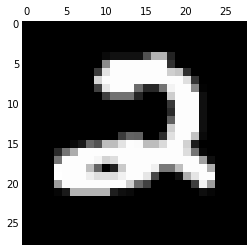

In [5]:
def vector2image(vec):
    image = vec.reshape((28, 28))
    plt.matshow(image)
# Print the query image
vector2image(mnist_query_scaled)

- **Train an AutoEncoder**

In [6]:
# Takes a minute or two
model = ae.AutoEncoder(layers=[ae.Layer("Sigmoid", units=10)],
                       learning_rate=0.002,
                       n_iter=5,
                       dropout_rate=0.5)

In [7]:
model.fit(mnist_train_scaled)

- **Project the train data and the query to a lower dimensional space**

In [8]:
mnist_train_reduced = model.transform(mnist_train_scaled)

In [9]:
mnist_query_reduced = model.transform(mnist_query_scaled)

- **Check shape of the transformed vectors**

In [10]:
mnist_train_reduced.shape

(27999, 10)

In [11]:
mnist_query_reduced.shape

(1, 10)

- **Get the top k most similar images to the query image**

In [12]:
def get_top_k_similar(query_reduced, train_reduced, train_scaled, k=10):
    # cosine calculates the cosine distance, not similiarity. Hence no need to reverse list
    top_k_ind = np.argsort([cosine(query_reduced, train_reduced_row) \
                            for ith_row, train_reduced_row in enumerate(train_reduced)])[:k]
    top_k_image_vector = train_scaled[top_k_ind]
    for image_vector in top_k_image_vector:
        vector2image(image_vector)

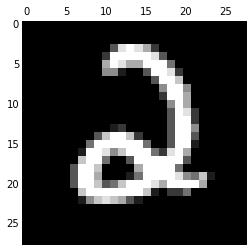

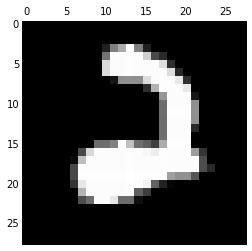

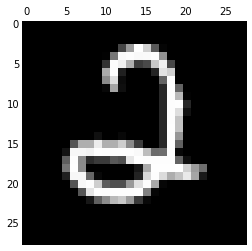

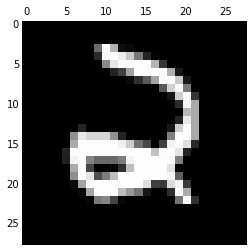

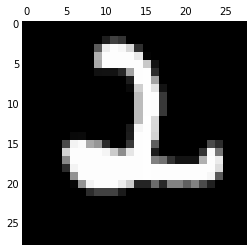

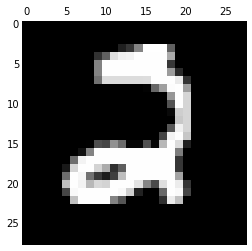

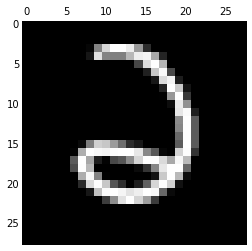

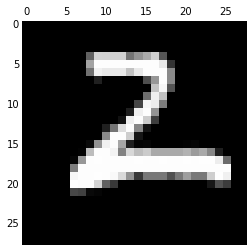

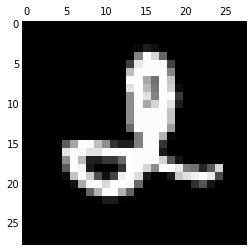

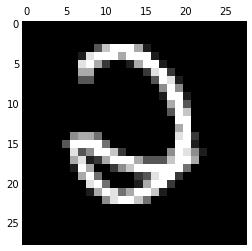

In [13]:
get_top_k_similar(mnist_query_reduced, mnist_train_reduced, mnist_train_scaled, k=10)